In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os


# Read and create dictionary

In [28]:

directory = os.fsencode('flegrei_2014_2023_GOSSIP')
print('reading and saving:')

for file in os.listdir(directory):
    filename = os.fsdecode(file)

    if filename.endswith(".csv"): 
        print(filename)

        with open('flegrei_2014_2023_GOSSIP/'+filename, newline='') as f:
            first_line=True
            reader = csv.reader(f, delimiter=',')
            cat={}
            for row in reader:
                if first_line==True:
                    first_line=False
                    for key in row:
                        cat.setdefault(key,[])
                else:
                        for n,key in enumerate(cat):
                             cat[key].append(row[n])

        del cat['Area']
        del cat['Type']
        del cat['Level']
        del cat['MagType']

        np.save('flegrei_2014_2023_GOSSIP/'+ filename[:-4] +'.npy', cat)
    else:
        continue

reading and saving:
events_2017.csv
events_2016.csv
events_2014.csv
events_2015.csv
events_2018.csv
events_2019.csv
events_2022.csv
events_2023.csv
events_2021.csv
events_2020.csv


### load dictionary

In [29]:
directory = os.fsencode('flegrei_2014_2023_GOSSIP')

print('loading dictionaries:')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    
    if filename.endswith(".npy"): 
        print(filename)
        var_name='cat' + filename[6:-4]
        cat=np.load('flegrei_2014_2023_GOSSIP/'+ filename , allow_pickle='TRUE').item()
        exec(f"{var_name} = {cat}")
    else:
        continue

loading dictionaries:
events_2014.npy
events_2015.npy
events_2017.npy
events_2016.npy
events_2018.npy
events_2019.npy
events_2021.npy
events_2020.npy
events_2022.npy
events_2023.npy


# CODE

In [30]:
print(type(cat_2020))
print(cat_2020.keys())


<class 'dict'>
dict_keys(['#EventID', 'Time', 'Latitude', 'Longitude', 'Depth/km', 'Magnitude', 'MagErr'])


events number: 315


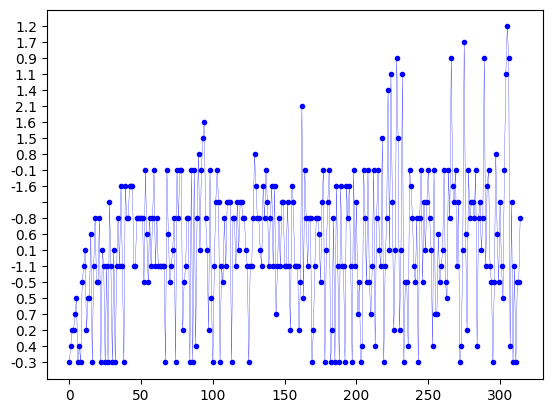

In [31]:
plt.figure()
y=cat_2016['Magnitude']
plt.plot(y,'.-b',linewidth=0.2)
print('events number:',len(y))
